In [5]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [1]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [6]:
URL = r"https://www.dropbox.com/s/qa1hsyxt66pvj02/opencv_bootcamp_assets_NB10.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB10.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [7]:
def readImagesAndTimes():
    # list of file names
    filenames =["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg","img_15.jpg"]
    
    # list of exposure times
    times = np.array([1 / 30.0, 0.25, 2.5,15.0], dtype=np.float32)
    
    # read images
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
        
    return images, times

In [8]:
# read images and exposure times 
images, times = readImagesAndTimes()

# align images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

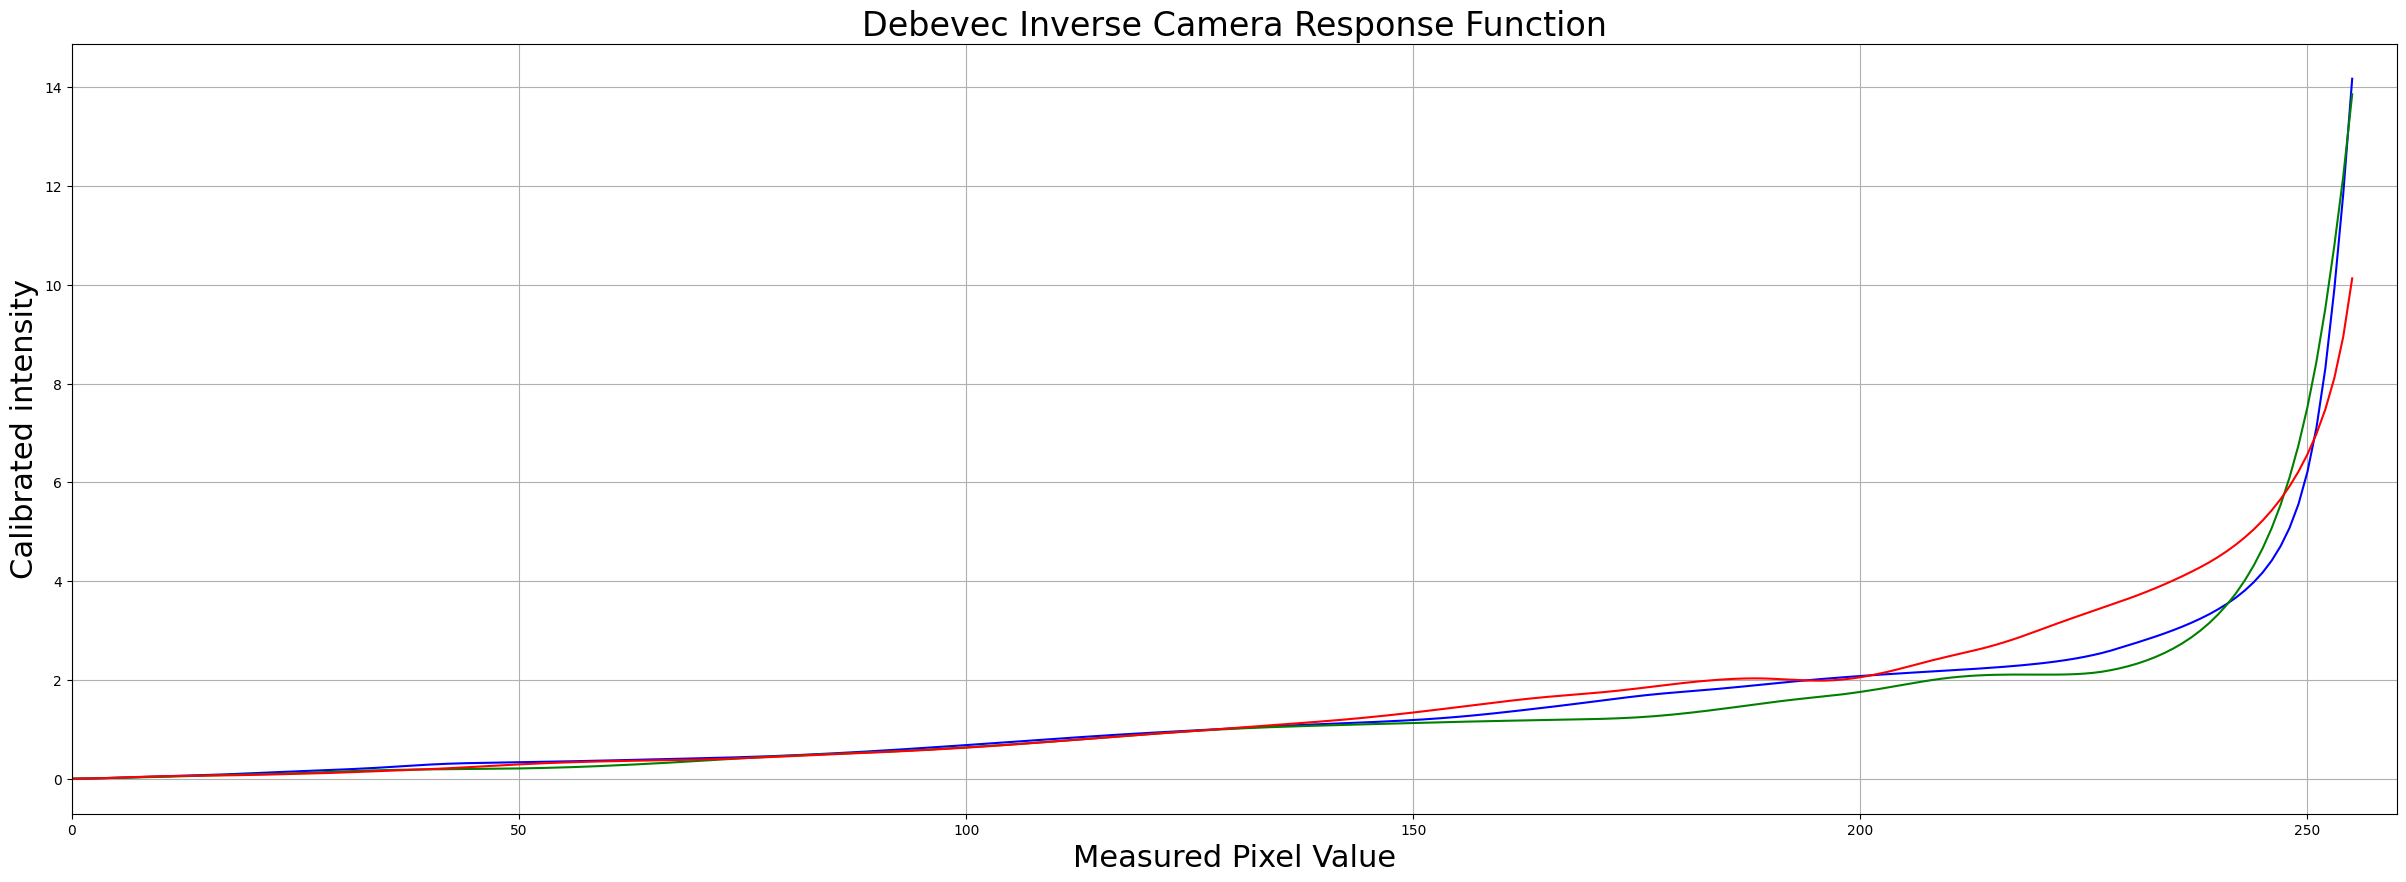

In [9]:
# find camera response function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# plot CRF

x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)


ax = plt.figure(figsize =[30,10])
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated intensity", fontsize=22)
plt.xlim([0,260])
plt.grid()
plt.plot(x, y[:,0], "b",x,y[:,1],"g",x,y[:,2], "r")

In [10]:
# merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec= mergeDebevec.process(images, times , responseDebevec)

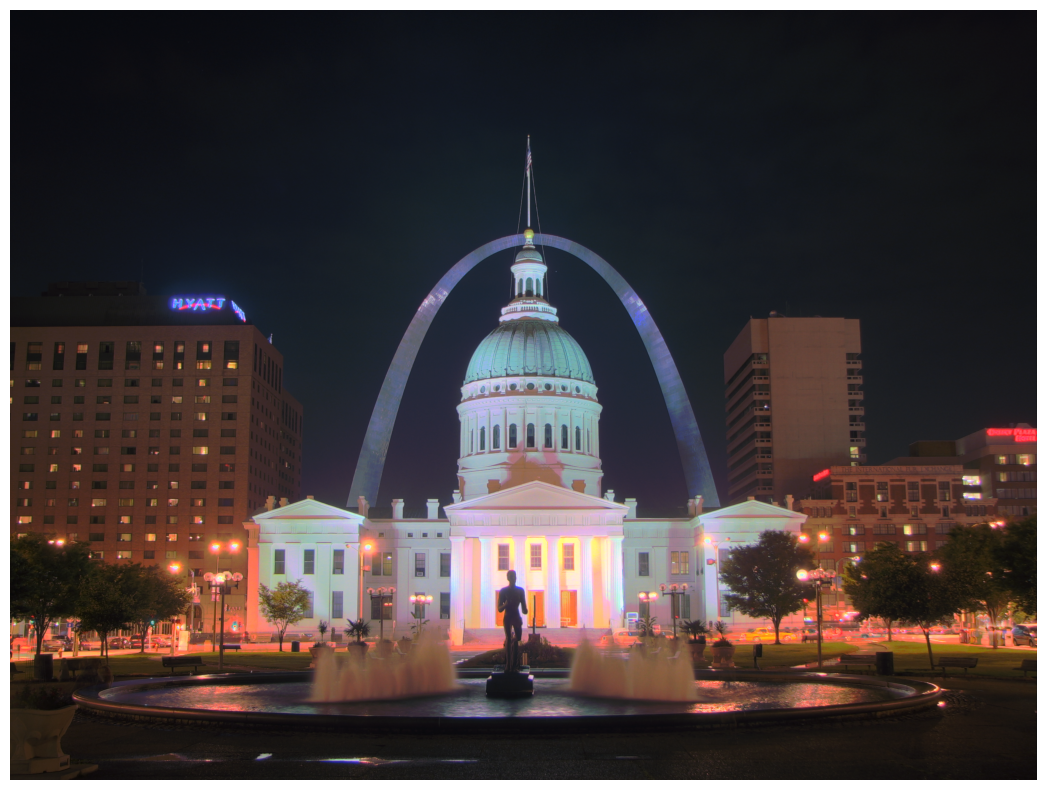

In [14]:
# tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0,0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago

# saving image
cv2.imwrite("ldr-Drago.jpg", 25*ldrDrago)

#plotting image
plt.figure(figsize=(20,10));plt.imshow(np.clip(ldrDrago,0,1)[:,:,::-1]);plt.axis("off");

Tonemaping using Reinhard's method ...


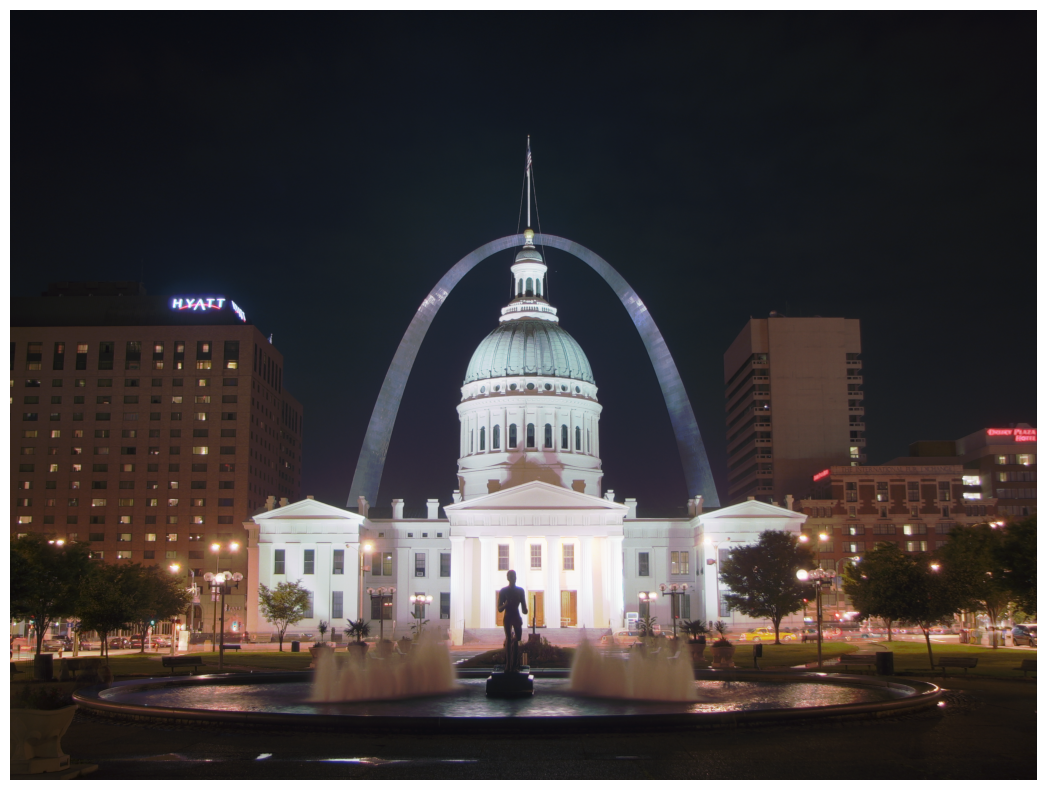

In [15]:
# Tonemap using Reinhard's method to obtain 24-bit color image
print("Tonemaping using Reinhard's method ...")
tonemapReinhard = cv2.createTonemapReinhard(1.5,0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)

# saving image
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)

#plotting image
plt.figure(figsize=(20,10));plt.imshow(np.clip(ldrReinhard,0,1)[:,:,::-1]);plt.axis("off");

tonemapping using Mantiuk's method ...


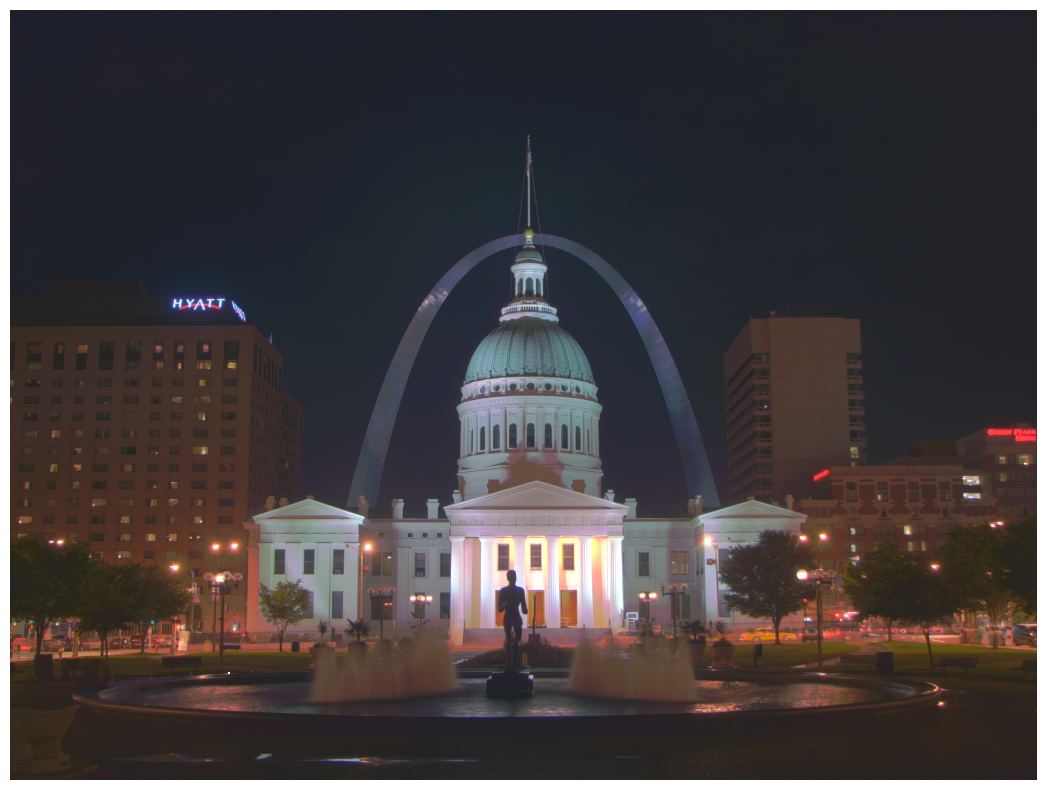

In [16]:
# tonemap using Mantiuk's method to obtain 24-bit color image
print("tonemapping using Mantiuk's method ...")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85,1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk

# saving image
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)

#plotting image
plt.figure(figsize=(20,10));plt.imshow(np.clip(ldrMantiuk,0,1)[:,:,::-1]);plt.axis("off");
